## Lab 2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
# spacing in column names
# better to eliminate them
df.columns = df.columns.str.replace(' ','')

### Ans 1

In [4]:
print("Number of records: ", df.shape[0])

Number of records:  149


### Ans 2

In [5]:
df.sort_values(by = ['ReleaseTime','ReleaseDate'] , inplace=True ,ascending = False)

In [6]:
df.value_counts(df['Genre'])

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
dtype: int64

In [7]:
# we notice that genre has Duplicate values because of errorneous spacing. 
# let us fix that first
df['Genre'] = df['Genre'].str.replace(' ','')
genres = df.value_counts(df['Genre'])
genres

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
dtype: int64

### Ans 3

In [8]:
print("Genre with highest releases is: " , genres.index[0])

Genre with highest releases is:  Comedy


### Ans 4

In [9]:
pd.crosstab(index=df['ReleaseTime'],columns=df['Genre'])

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


In [10]:
#replace 
df.loc[df['ReleaseTime'] == 'LW','ReleaseTime'] = 'LongWeekend'
df.loc[df['ReleaseTime'] == 'FS','ReleaseTime'] = 'FestiveSeason'
df.loc[df['ReleaseTime'] == 'HS','ReleaseTime'] = 'HolidaySeason'
df.loc[df['ReleaseTime'] == 'N','ReleaseTime'] = 'Normal'

In [11]:
pd.crosstab(index=df['ReleaseTime'],columns=df['Genre'])

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FestiveSeason,3,3,4,3,4
HolidaySeason,3,5,6,3,1
LongWeekend,3,5,1,4,2
Normal,15,23,24,15,22


### Ans 5

In [12]:
temp = df['ReleaseDate'].str.split('-', expand=True)
temp.columns = ['Day','Month','Year']
temp.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,temp],axis=1)

In [13]:
df['Month'].value_counts().min()

2

In [14]:
months = df['Month'].value_counts(sort = True, ascending=True)
print("Month that saw least amount of release: ", months.index[0])


Month that saw least amount of release:  Dec


<AxesSubplot:>

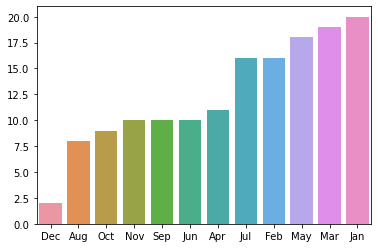

In [15]:
sns.barplot(x = months.index, y = months.values)

### Ans 6

In [16]:
low_budget_movies = df.loc[df['Budget'] <= 25]
pd.crosstab(low_budget_movies['MovieName'],columns=low_budget_movies['Month'])
low_budget_movies_month = low_budget_movies['Month'].value_counts(sort = True)
print("Month that saw MOST amount of low budget releases: ", low_budget_movies_month.index[0])

Month that saw MOST amount of low budget releases:  May


<AxesSubplot:>

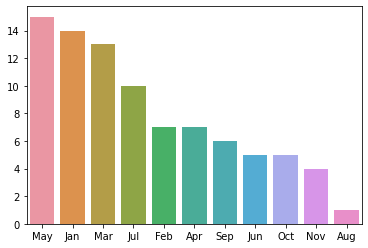

In [17]:
sns.barplot(x = low_budget_movies_month.index, y = low_budget_movies_month.values)

### Ans 7

In [18]:
# calculating ROI
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget'])/df['Budget']
best_roi = df.sort_values(by = 'ROI',ascending=False)[0:10][['MovieName','ROI']]
best_roi

,MovieName,ROI
44,Aashiqui 2,8.166667
128,PK,7.647059
108,Grand Masti,7.514286
66,The Lunchbox,7.500000
86,Fukrey,6.240000
12,Mary Kom,5.933333
139,Shahid,5.666667
93,Humpty Sharma Ki Dulhania,5.500000
91,Bhaag Milkha Bhaag,4.466667
132,Chennai Express,4.266667


<AxesSubplot:xlabel='ROI', ylabel='MovieName'>

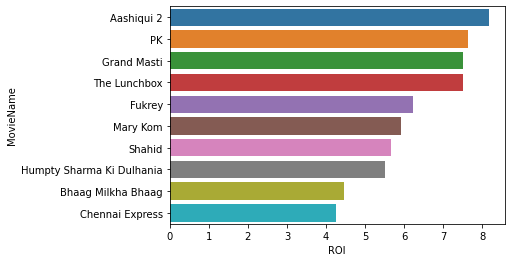

In [19]:
sns.barplot(y = best_roi['MovieName'], x = best_roi['ROI'])

### Ans 8

<AxesSubplot:>

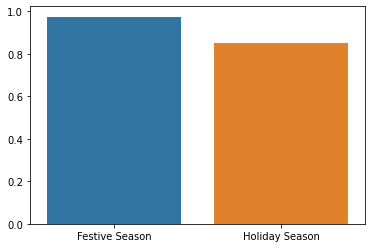

In [20]:
festive_season = df.loc[df['ReleaseTime'] == 'FestiveSeason']
holiday_season = df.loc[df['ReleaseTime'] == 'HolidaySeason']
long_weekend = df.loc[df['ReleaseTime'] == 'LongWeekend']
normal_season = df.loc[df['ReleaseTime'] == 'Normal']
festive_season_mean = festive_season['ROI'].mean()
holiday_season_mean = holiday_season['ROI'].mean()
long_weekend_mean = long_weekend['ROI'].mean()
normal_season_mean = normal_season['ROI'].mean()
sns.barplot(x = ['Festive Season','Holiday Season'] , y = [festive_season_mean,holiday_season_mean])

In [21]:
df_roi_season = pd.DataFrame(columns =['Season','ROI_mean'])
df_roi_season['ROI_mean'] = [festive_season_mean,holiday_season_mean,long_weekend_mean,normal_season_mean]
df_roi_season['Season'] = ['FestiveSeason','HolidaySeason','LongWeeked','Normal']
df_roi_season

,Season,ROI_mean
0,FestiveSeason,0.973853
1,HolidaySeason,0.850867
2,LongWeeked,1.127205
3,Normal,0.657722


### Ans 9 

In [22]:
print("Correlation between YoutubeLikes and BoxOfficeCollection is: %.4f"
      % df[['YoutubeLikes','BoxOfficeCollection']].corr().iloc[0,1])


Correlation between YoutubeLikes and BoxOfficeCollection is: 0.6825


<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='YoutubeLikes'>

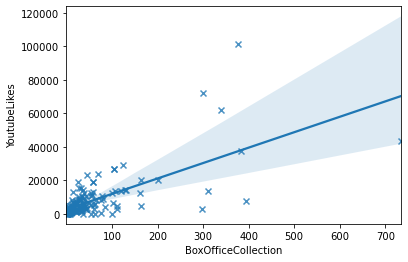

In [23]:
fig, ax = plt.subplots()
sns.regplot(data=df, x='BoxOfficeCollection', y='YoutubeLikes',marker='x')

### Ans 10

In [24]:
df_copy = df.sort_values(['Genre','YoutubeViews'])

<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

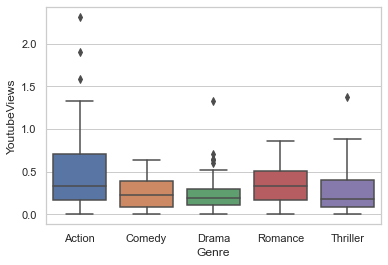

In [25]:
# youtube views are in order of 10^7
# let us scale the column to better suit are needsd
df_copy['YoutubeViews'] = df_copy['YoutubeViews']/10**7

sns.set_theme(style="whitegrid")
sns.boxplot(x = 'Genre' , y = "YoutubeViews" , data = df_copy)

In [26]:
df.groupby('Genre').describe()['BoxOfficeCollection']

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,24.0,91.680833,109.443375,0.09,15.575,56.725,121.25,377.0
Comedy,36.0,46.115000,80.245756,1.50,9.375,27.600,40.00,395.0
Drama,35.0,65.793143,135.210171,0.01,10.000,30.250,60.50,735.0
Romance,25.0,52.841200,66.720696,1.10,10.250,35.500,65.00,311.0
Thriller,29.0,27.936207,33.664628,0.24,4.500,20.000,32.10,162.0


### Ans 11

In [27]:
df_copy = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]
df_corr = df_copy.corr()
df_corr

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


<AxesSubplot:>

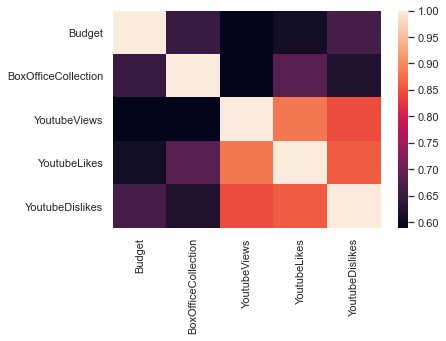

In [28]:
sns.heatmap(df_corr)

In [29]:
high_corr = 0.75
df_corr[df_corr[:] >= high_corr]

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.0,NaN,NaN,NaN,NaN
BoxOfficeCollection,NaN,1.0,NaN,NaN,NaN
YoutubeViews,NaN,NaN,1.000000,0.884055,0.846739
YoutubeLikes,NaN,NaN,0.884055,1.000000,0.859730
YoutubeDislikes,NaN,NaN,0.846739,0.859730,1.000000


### Ans 12

In [30]:
df['Year'].unique()

array(['15', '13', '14'], dtype=object)

In [31]:
df.groupby('Genre').describe()['BoxOfficeCollection']

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,24.0,91.680833,109.443375,0.09,15.575,56.725,121.25,377.0
Comedy,36.0,46.115000,80.245756,1.50,9.375,27.600,40.00,395.0
Drama,35.0,65.793143,135.210171,0.01,10.000,30.250,60.50,735.0
Romance,25.0,52.841200,66.720696,1.10,10.250,35.500,65.00,311.0
Thriller,29.0,27.936207,33.664628,0.24,4.500,20.000,32.10,162.0


(0.0, 4.0)

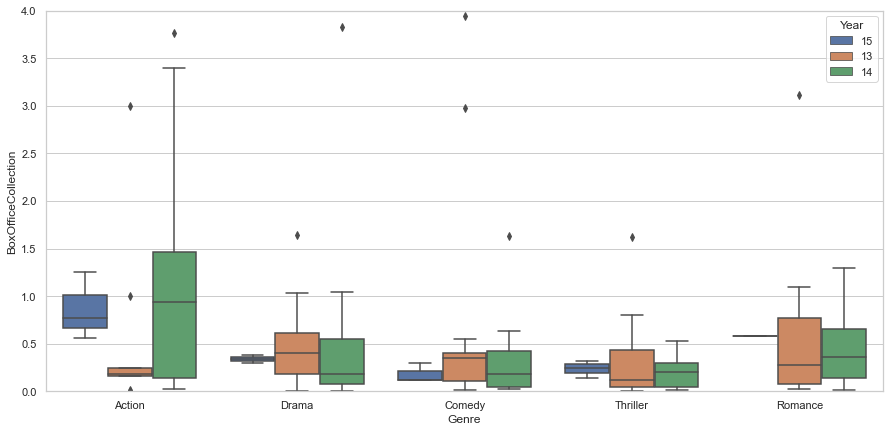

In [32]:
sns.set_theme(style="whitegrid")
df_copy = df.copy()
df_copy['BoxOfficeCollection'] = df_copy['BoxOfficeCollection']/100
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(x = 'Genre' , y = 'BoxOfficeCollection',hue='Year' , data = df_copy)
ax.set_ylim(0,4)

<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='Count'>

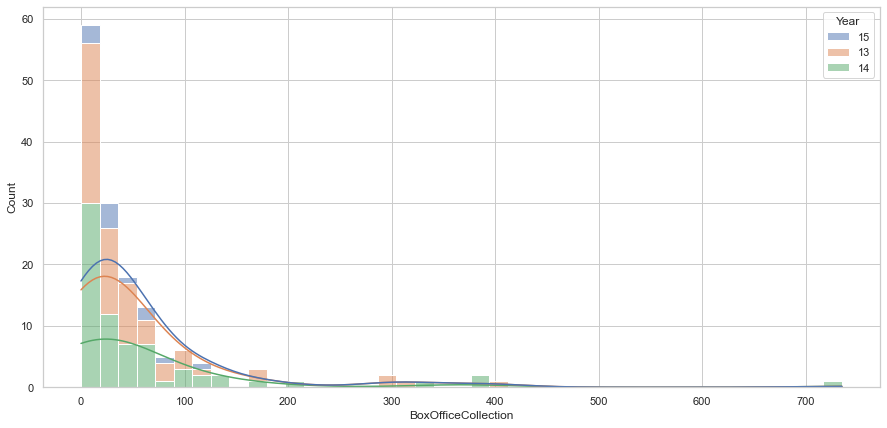

In [33]:
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data=df, x="BoxOfficeCollection", hue="Year", multiple="stack", kde = True)

### Ans 13

<AxesSubplot:xlabel='Budget', ylabel='BoxOfficeCollection'>

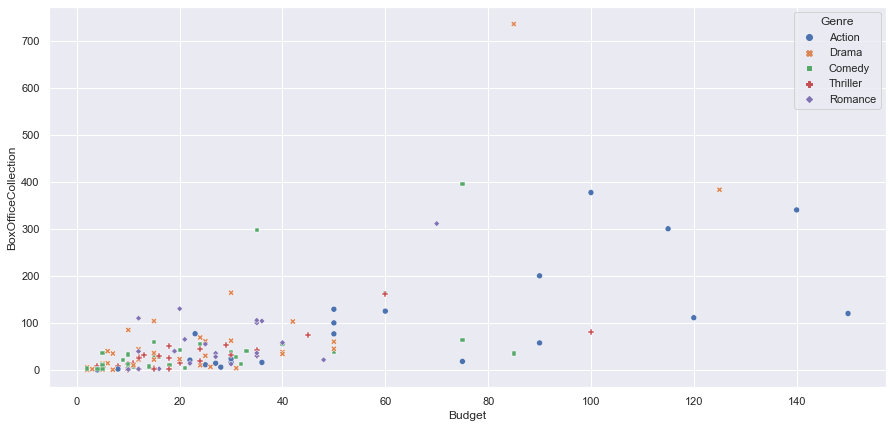

In [34]:
sns.set_style("darkgrid")
fig , ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=df,x='Budget',y='BoxOfficeCollection',hue='Genre',style='Genre')

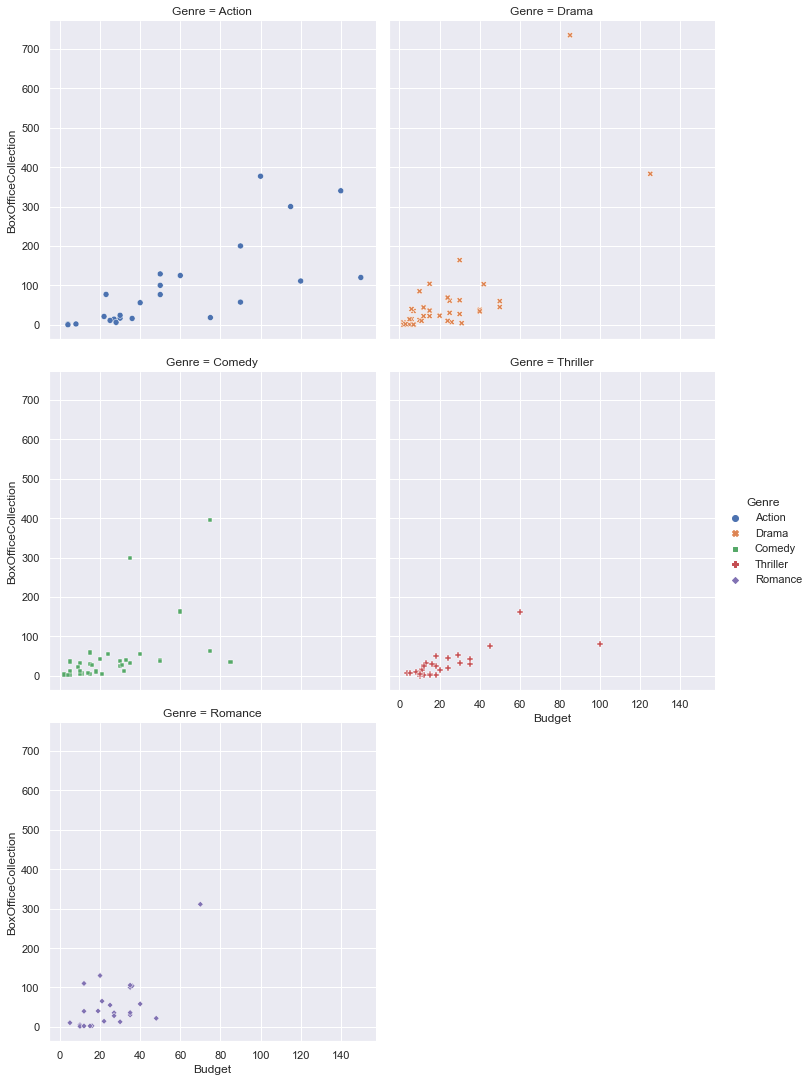

In [35]:
sns.relplot(data=df,x='Budget',y='BoxOfficeCollection',col="Genre",hue='Genre',style='Genre',kind="scatter", col_wrap=2)

### Ans 14

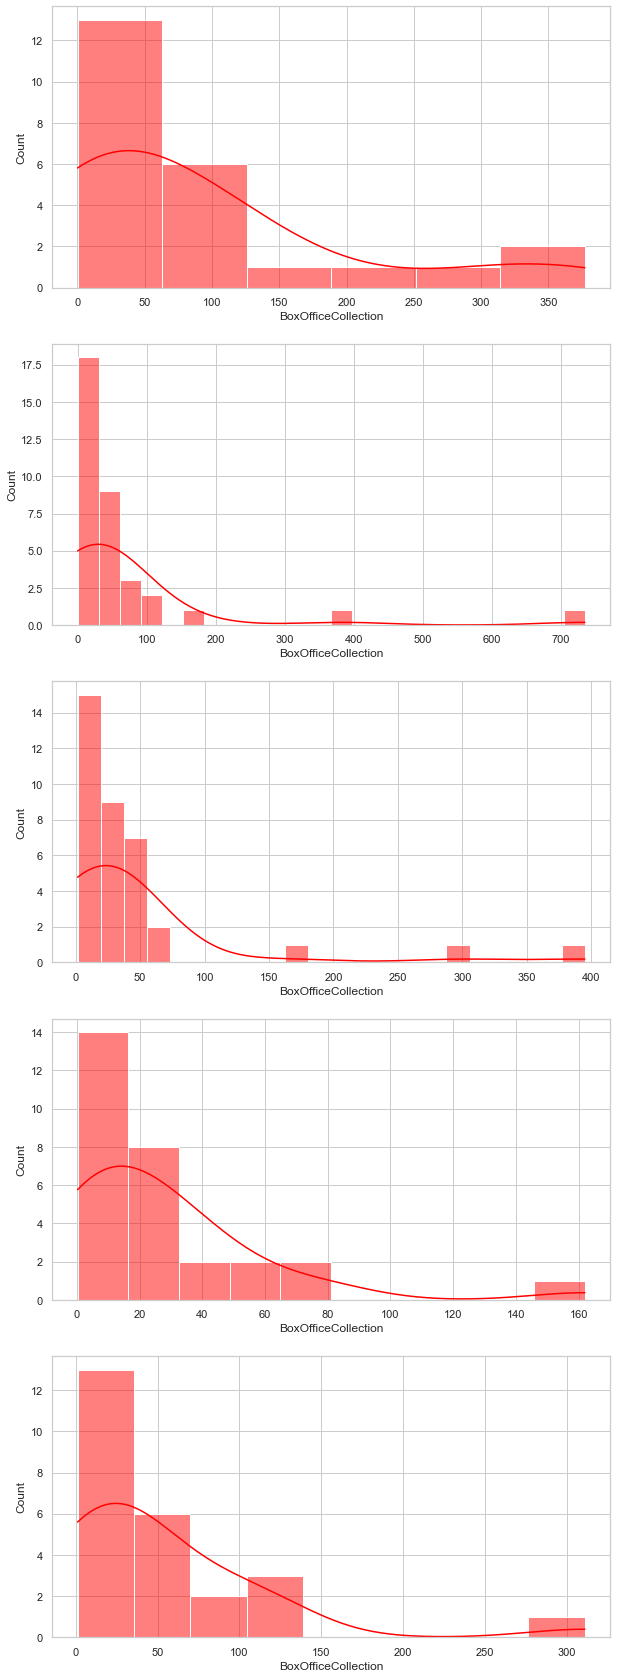

In [36]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(5,1,figsize = (10,30))
for i,genre in enumerate(df['Genre'].unique()):
    sns.histplot(df.loc[df['Genre'] == genre]['BoxOfficeCollection'], kde = True, color ='red', ax = axes[i])

target_0 = df.loc[df['Genre'] == 'Action']
target_1 = df.loc[df['Genre'] == 'Comedy']
target_2 = df.loc[df['Genre'] == 'Romance']
target_3 = df.loc[df['Genre'] == 'Thriller']
target_4 = df.loc[df['Genre'] == 'Drama']


sns.histplot(df, hist=True, kde=False)

<AxesSubplot:xlabel='BoxOfficeCollection', ylabel='Count'>

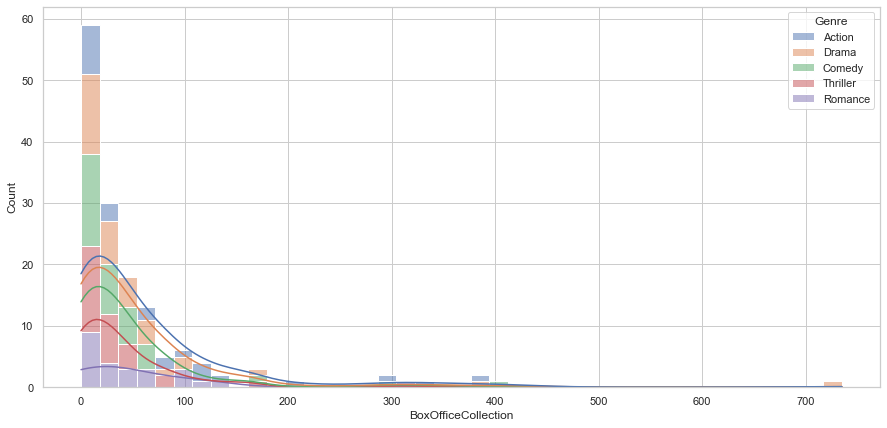

In [37]:
fig, ax = plt.subplots(figsize = (15,7))
sns.histplot(data=df, x="BoxOfficeCollection", hue="Genre", multiple="stack", kde = True)

### Ans 15

<AxesSubplot:xlabel='YoutubeViews', ylabel='YoutubeLikes'>

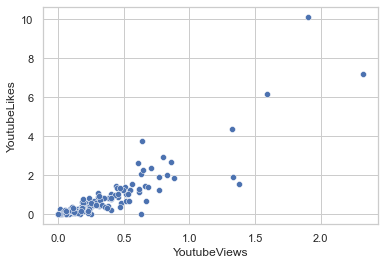

In [38]:
df_copy = df.copy()
df_copy['YoutubeViews'] = df_copy['YoutubeViews']/10**7
df_copy['YoutubeLikes'] = df_copy['YoutubeLikes']/10**4
sns.scatterplot(x = 'YoutubeViews', y = 'YoutubeLikes', data=df_copy)